In [6]:
from keras.applications import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, concatenate, BatchNormalization
from keras import backend as k
import keras
from keras import models
from keras import layers
from keras import optimizers
import tensorflow as tf
import os
import numpy as np
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from keras import callbacks
reduceLearningRate  = 0.5
image_size=224

<h1> Challenge 1 Validation Set

In [7]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
image_size=224


modelfinal = load_model('outputschallenge1/model-062.h5')

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_datagen.flow_from_directory(
    directory=r"datavalchallenge1/",
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=42)

test_generator.reset()
pred=modelfinal.predict_generator(test_generator,verbose=1,steps=len(test_generator))


Found 1200 images belonging to 1 classes.
1200/1200 [==============================] - 16s 13ms/step


0.9542708333333333


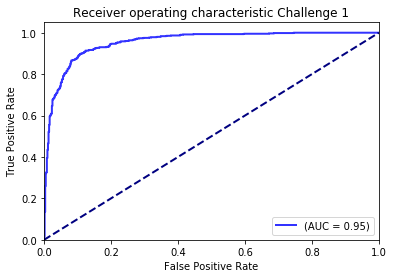

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
ylabel1=np.ones((1200,1))
ylabel1[0:600] = 0
fpr, tpr, thresholds = roc_curve(ylabel1, pred[:,0],pos_label=0)
roc_auc = auc(fpr, tpr)
print (roc_auc)
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='b',
         label=r'(AUC = %0.2f)' % (roc_auc),
         lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Challenge 1')
plt.legend(loc="lower right")


In [24]:
 from sklearn.metrics import confusion_matrix, classification_report
prediction=np.argmax(pred,axis=1)
ylabelnew=np.ones((1200,1))
ylabelnew[0:600] = 0
confusion_matrix(ylabelnew, prediction)


array([[536,  64],
       [ 64, 536]], dtype=int64)

In [42]:
#Class wise Accuracy
error=np.sum(prediction[0:600])
accuracy = (600-error)/600
accuracy

0.8933333333333333

In [44]:
acc=np.sum(prediction[600:1200])/600
acc

0.8933333333333333

In [23]:
target_names = ['class 0', 'class 1']
print(classification_report(ylabelnew, prediction, target_names=target_names))
             

              precision    recall  f1-score   support

     class 0       0.89      0.89      0.89       600
     class 1       0.89      0.89      0.89       600

   micro avg       0.89      0.89      0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



<h1> Challenge 1 Test Set

In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
currentPath= os.getcwd()
test_dir = os.path.join(currentPath, 'testChallenge1/')
image_size=224

test_datagen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = preprocess_input)

test_generator = test_datagen.flow_from_directory(
    directory=r"testChallenge1/",
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=42)

test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1,steps=len(test_generator))


In [9]:
submission1=np.argmax(pred,axis=1)

In [ ]:
np.savetxt("submissionnew1.csv", submission1, delimiter=",")